# Import Required Libraries

In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# sklearn libraries

# Load your dataset in python

In [110]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [111]:
pd.set_option('display.max_columns',21)
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Verify your dataset

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [113]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [125]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [126]:
pd.to_numeric(data.TotalCharges,errors='coerce')  # introduce NaN (Not a Number) where ever there is error in parsing

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [127]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [128]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Extract Features and Target

In [130]:
x = data.iloc[:,1:20]
x.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65

In [131]:
y = data.Churn
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

# Split your data into training and testing datasets

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.85,random_state=4892)

In [134]:
xtrain.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5023  Female              0      No         No       1          Yes   
2614  Female              0     Yes        Yes      67          Yes   
6823  Female              0      No         No       4          Yes   
1881    Male              0      No         No      26           No   
5488    Male              1     Yes         No      45          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
5023              Yes           Electronic check           70.30         70.30  
2614              Yes    Credit card (automatic)           94.35       6341.45  
6823              Yes  Bank transfer (automatic)           50.55        235.65  
1881              Yes  Bank transfer (automatic)           44.65       1156.55  
5488              Yes  Bank transfer (automatic)           98.70       4525.80

In [135]:
ytrain.head()

5023    Yes
2614    Yes
6823     No
1881     No
5488     No
Name: Churn, dtype: object

In [136]:
xtest.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2721    Male              1      No         No      10          Yes   
6255    Male              1     Yes         No      69          Yes   
886   Female              1      No         No       7          Yes   
3412    Male              0     Yes        Yes       2          Yes   
6499    Male              0      No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2721            No     Fiber optic                   No                   No   
6255           Yes     Fiber optic                  Yes                   No   
886             No     Fiber optic                   No                   No   
3412            No             DSL                  Yes                  Yes   
6499            No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2721                   No                   No                   No   
6255                  Yes                  Yes                  Yes   
886                   Yes                   No                  Yes   
3412                   No                  Yes                   No   
6499  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
2721                  Yes  Month-to-month              Yes  Electronic check   
6255                  Yes        One year              Yes      Mailed check   
886                    No  Month-to-month              Yes  Electronic check   
3412                   No        Two year               No      Mailed check   
6499  No internet service  Month-to-month               No      Mailed check   

      MonthlyCharges  TotalCharges  
2721           79.25        793.55  
6255          110.55       7610.10  
886            84.35        609.65  
3412           59.50        130.50  
6499           20.30         20.30

In [137]:
ytest.head()

2721    Yes
6255     No
886      No
3412     No
6499     No
Name: Churn, dtype: object

# Data Cleaning
## Missing Value Treatment

In [138]:
xtrain.isnull()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
5023   False          False    False       False   False         False   
2614   False          False    False       False   False         False   
6823   False          False    False       False   False         False   
1881   False          False    False       False   False         False   
5488   False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
3865   False          False    False       False   False         False   
2520   False          False    False       False   False         False   
2165   False          False    False       False   False         False   
2766   False          False    False       False   False         False   
966    False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
5023          False            False           False         False   
2614          False            False           False         False   
6823          False            False           False         False   
1881          False            False           False         False   
5488          False            False           False         False   
...             ...              ...             ...           ...   
3865          False            False           False         False   
2520          False            False           False         False   
2165          False            False           False         False   
2766          False            False           False         False   
966           False            False           False         False   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
5023             False        False        False            False     False   
2614             False        False        False            False     False   
6823             False        False        False            False     False   
1881             False        False        False            False     False   
5488             False        False        False            False     False   
...                ...          ...          ...              ...       ...   
3865             False        False        False            False     False   
2520             False        False        False            False     False   
2165             False        False        False            False     False   
2766             False        False        False            False     False   
966              False        False        False            False     False   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
5023             False          False           False         False  
2614             False          False           False         False  
6823             False          False           False         False  
1881             False          False           False         False  
5488             False          False           False         False  
...                ...            ...             ...           ...  
3865             False          False           False         False  
2520             False          False           False         False  
2165             False          False           False         False  
2766             False          False           False         False  
966              False          False           False         False  

[5986 rows x 19 columns]

In [139]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [140]:
data.iloc[488].isnull()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
Name: 488, dtype: bool

<Axes: >

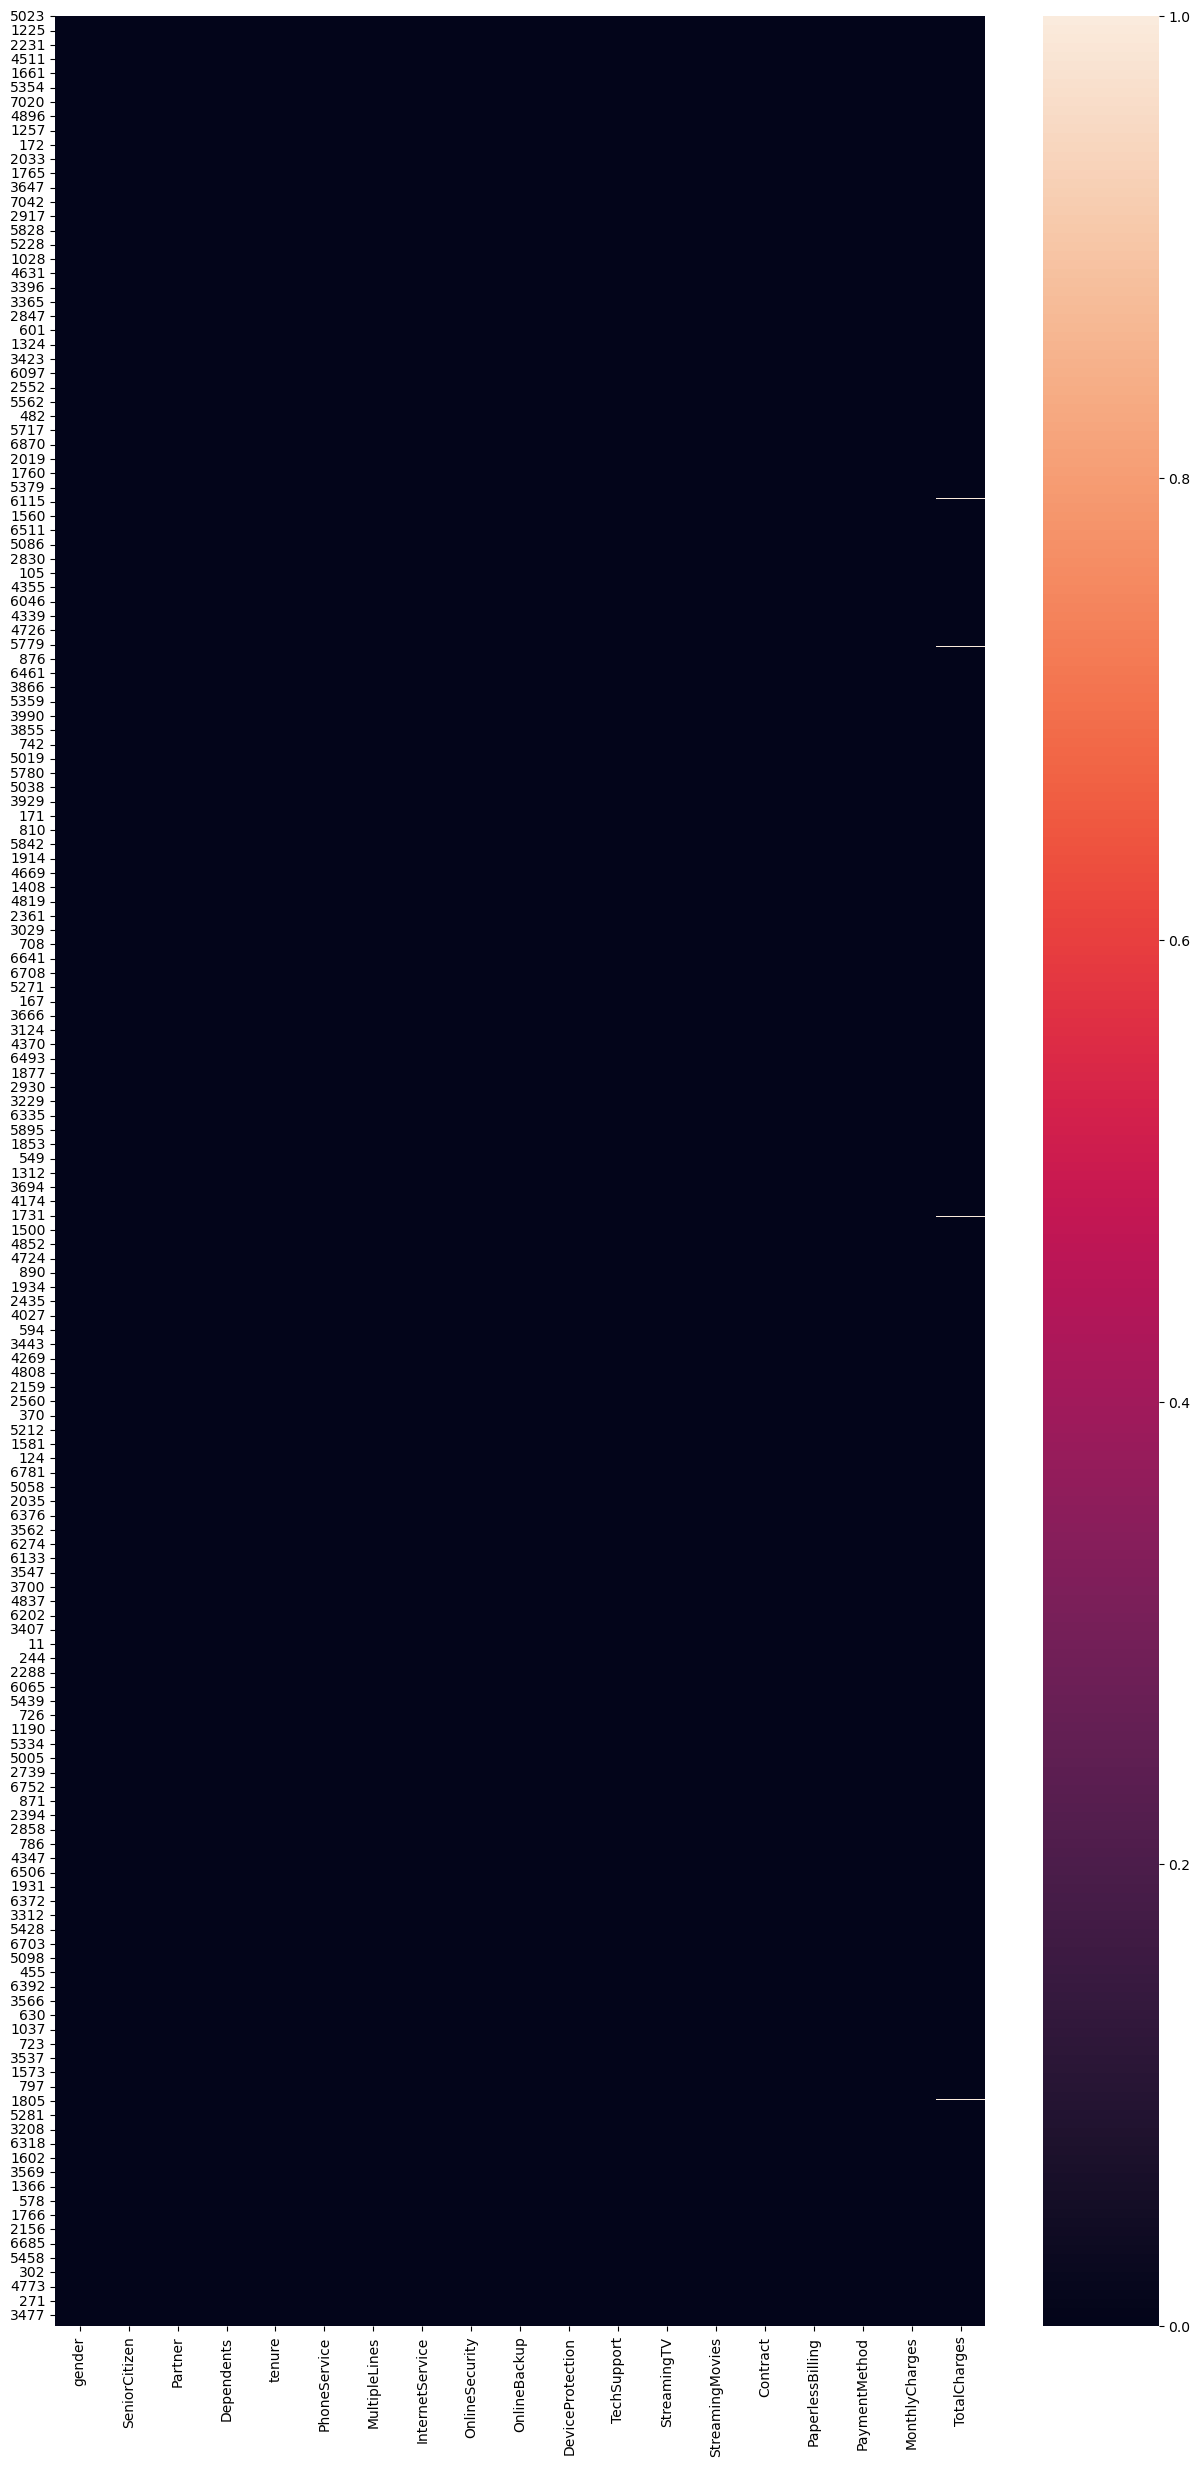

In [141]:
plt.figure(figsize=(15,30))
sns.heatmap(xtrain.isnull())  # visualize missing values across dataframe

In [142]:
xtrain.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [143]:
round(xtrain.isnull().sum() * 100 / xtrain.shape[0],2)

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.18
dtype: float64

In [144]:
xtrain.TotalCharges = xtrain.TotalCharges.fillna(xtrain.TotalCharges.mean())

In [145]:
xtrain.loc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2297.254552
Name: 488, dtype: object

In [146]:
xtest.isnull().sum()  # if missing values in testing, then replace with the TRAINING DATA Mean/Median/Mode

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Outlier Treatment

<Axes: >

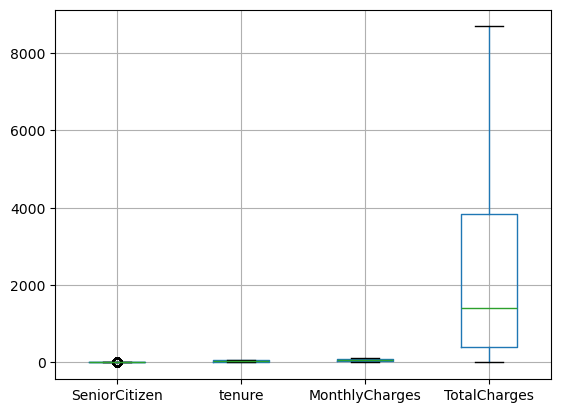

In [147]:
xtrain.boxplot()

In [148]:
xtrain.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5986.000000  5986.000000     5986.000000   5986.000000
mean        0.161042    32.395256       65.005471   2297.254552
std         0.367601    24.596584       30.102234   2276.281813
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.925000    404.237500
50%         0.000000    29.000000       70.450000   1414.725000
75%         0.000000    56.000000       90.050000   3832.775000
max         1.000000    72.000000      118.750000   8684.800000

<Axes: >

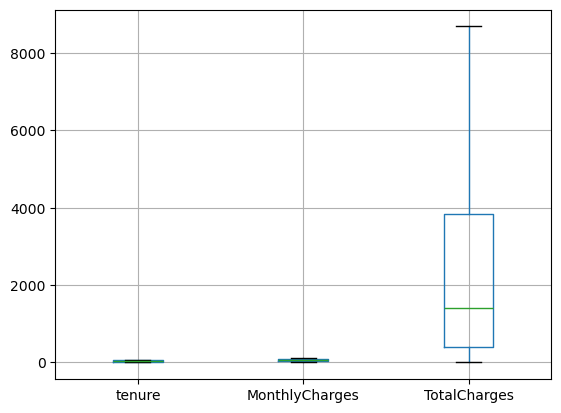

In [149]:
xtrain.boxplot(['tenure','MonthlyCharges','TotalCharges'])

### Loading another dataset for outlier analysis only

In [150]:
out_df = pd.read_csv('winequality.csv')
out_df.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...

In [151]:
out_df = pd.read_csv('winequality.csv',sep=';')
out_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

<Axes: >

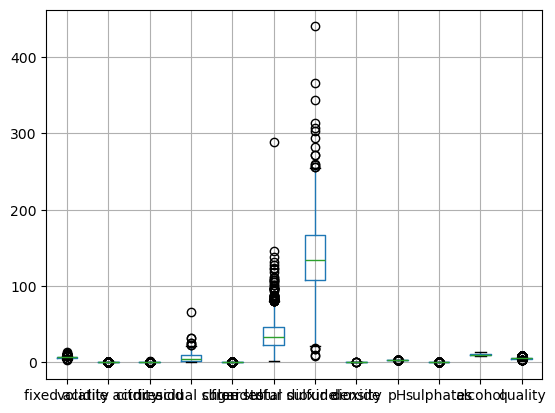

In [152]:
out_df.boxplot()

<Axes: >

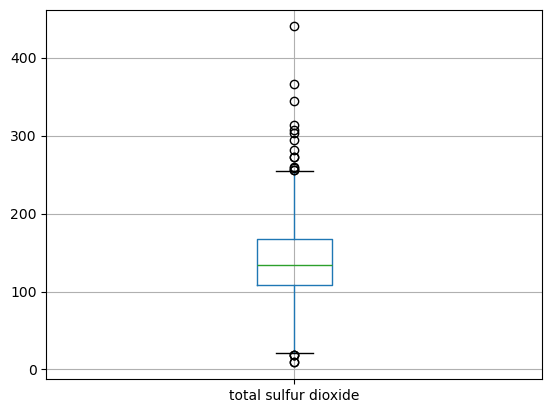

In [153]:
out_df.boxplot(['total sulfur dioxide'])

In [154]:
Q1 = out_df['total sulfur dioxide'].quantile(0.25)
Q3 = out_df['total sulfur dioxide'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f'Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}')

Q1: 108.0 | Q3: 167.0 | IQR: 59.0 | LL: 19.5 | UL: 255.5


In [155]:
ul_outlier_count = out_df[out_df['total sulfur dioxide'] > UL].shape[0]
ll_outlier_count = out_df[out_df['total sulfur dioxide'] < LL].shape[0]

total_outliers = ul_outlier_count + ll_outlier_count

perc_outliers = total_outliers * 100 / out_df.shape[0]

print(f'UL Outlier Count: {ul_outlier_count} | LL Outlier Count: {ll_outlier_count} | Total Outlier Count: {total_outliers} | Outlier%: {perc_outliers}')

UL Outlier Count: 14 | LL Outlier Count: 5 | Total Outlier Count: 19 | Outlier%: 0.38791343405471623


<Axes: >

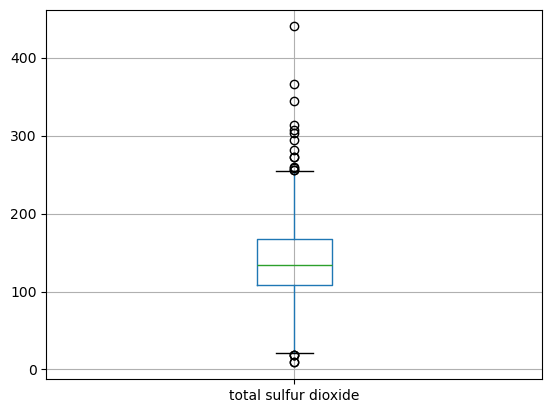

In [156]:
out_df.boxplot(['total sulfur dioxide'])

In [157]:
# my outliers are <=5%, hence replacing them with the corresponding limits
out_df.loc[out_df['total sulfur dioxide'] > UL] = UL
out_df.loc[out_df['total sulfur dioxide'] < LL] = LL

C:\Users\SAUVEER\AppData\Local\Temp\ipykernel_14536\2826737391.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '255.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out_df.loc[out_df['total sulfur dioxide'] > UL] = UL


<Axes: >

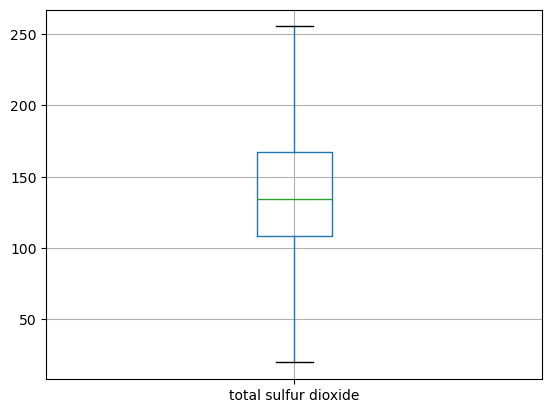

In [158]:
out_df.boxplot(['total sulfur dioxide'])

# EDA - Exploratory Data Analysis

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


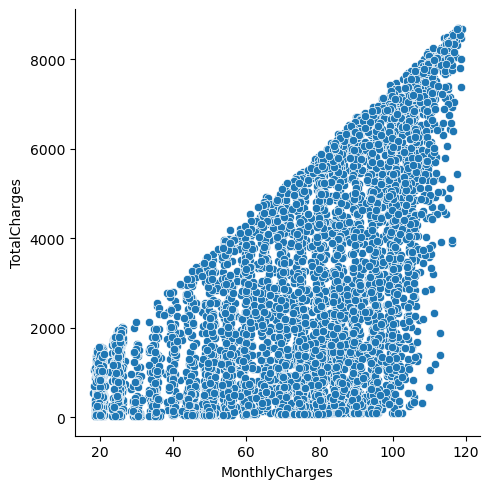

In [160]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',data=data)
# can see no relationship between the 2 cols, data is spreaded across

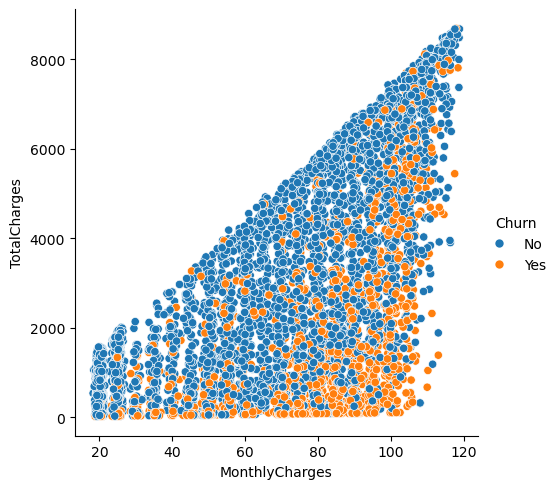

In [161]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=data)
# trying to find out the churn behaviour
# since the churned customers are all over the place coloring it is getting hard to analyse, hence we can split it

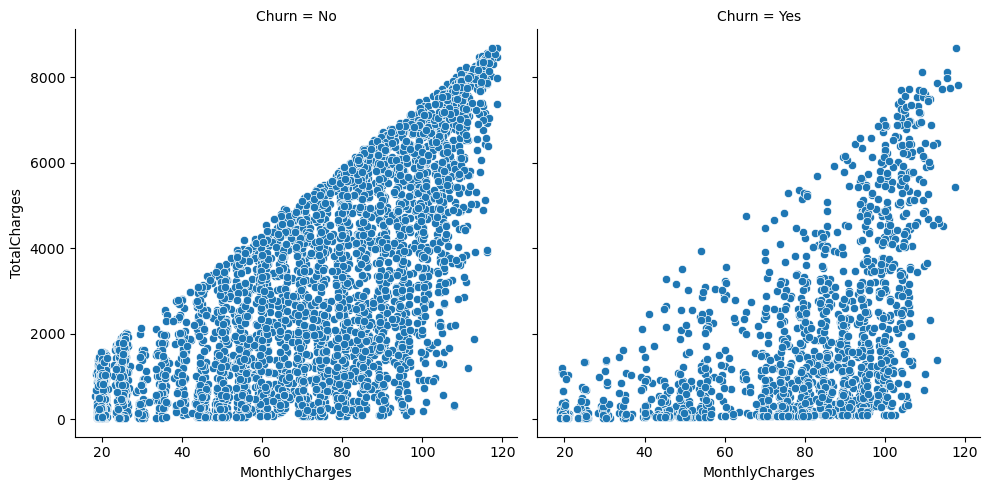

In [162]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',data=data)

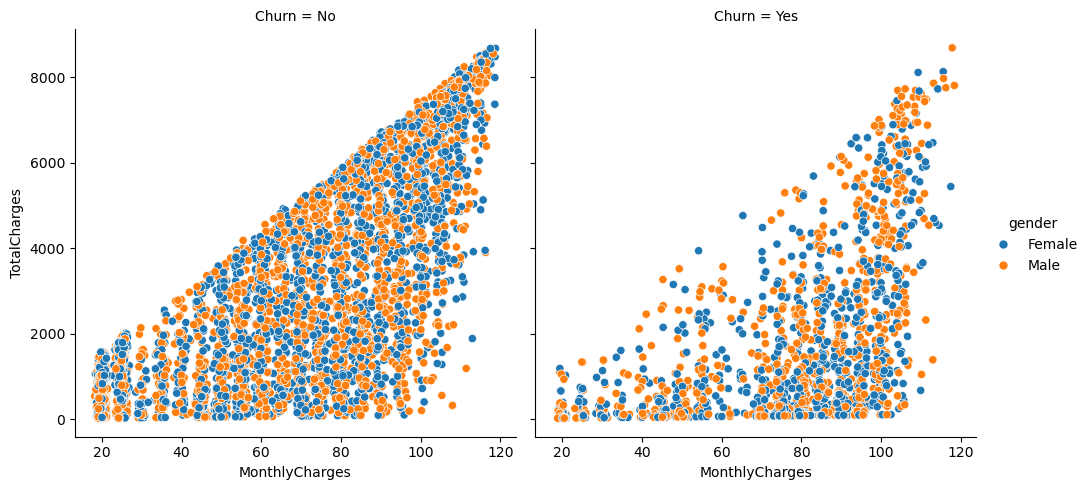

In [163]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='gender',data=data)
# plt.show()

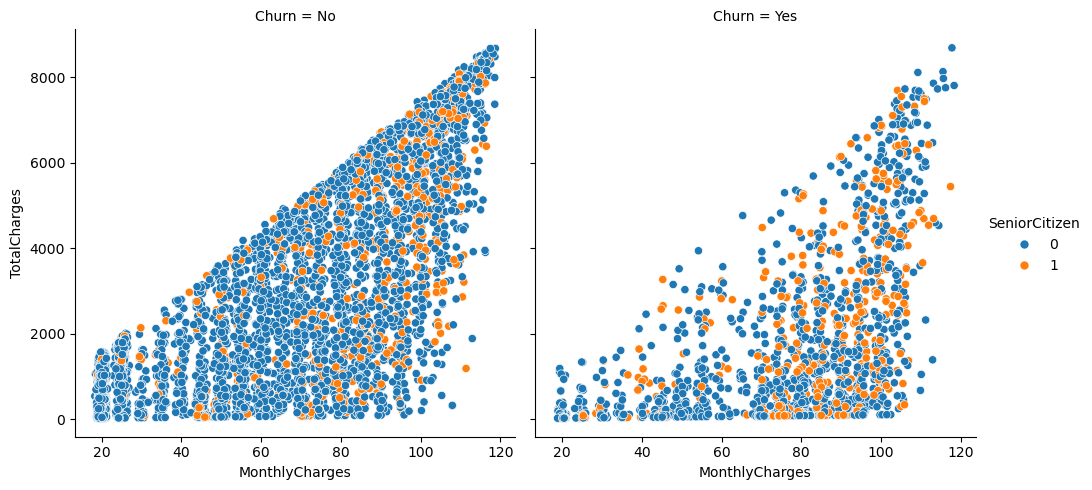

In [164]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='SeniorCitizen',data=data)
# plt.show()

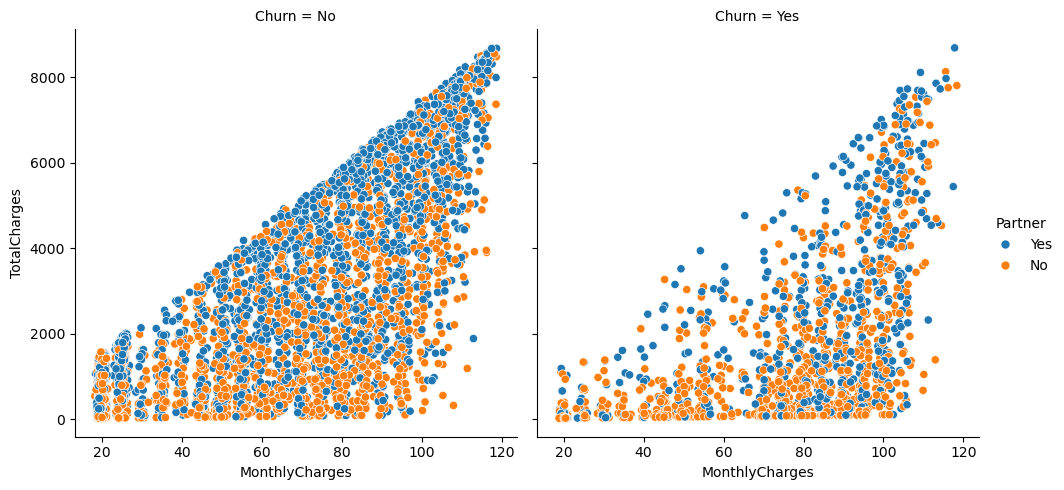

In [165]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='Partner',data=data)
# plt.show()

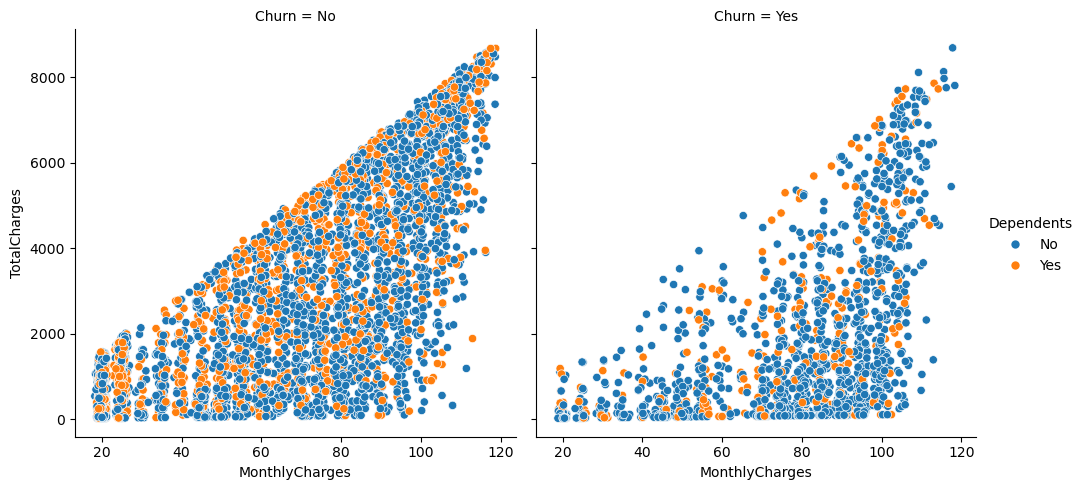

In [166]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='Dependents',data=data)
# plt.show()

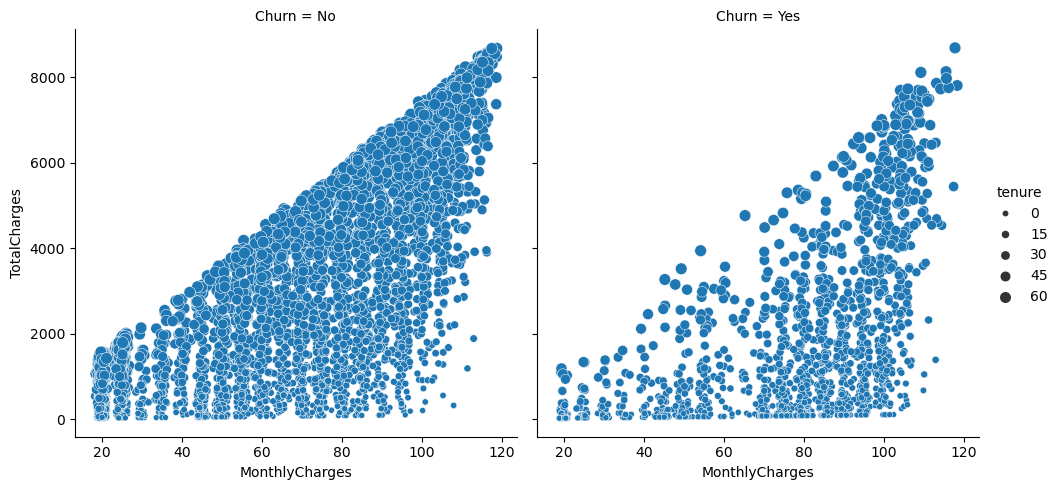

In [167]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',size='tenure',data=data)
# plt.show()

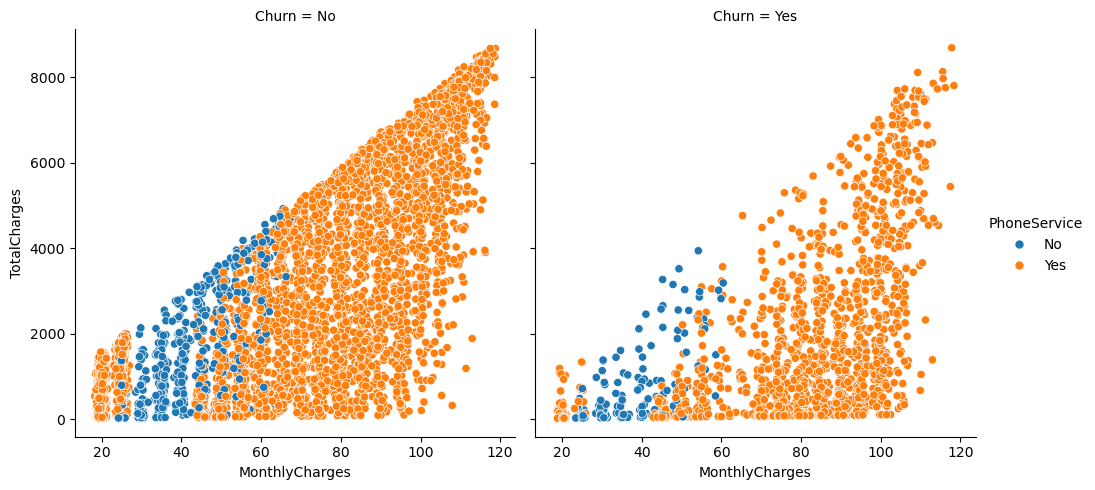

In [168]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='PhoneService',data=data)
# plt.show()

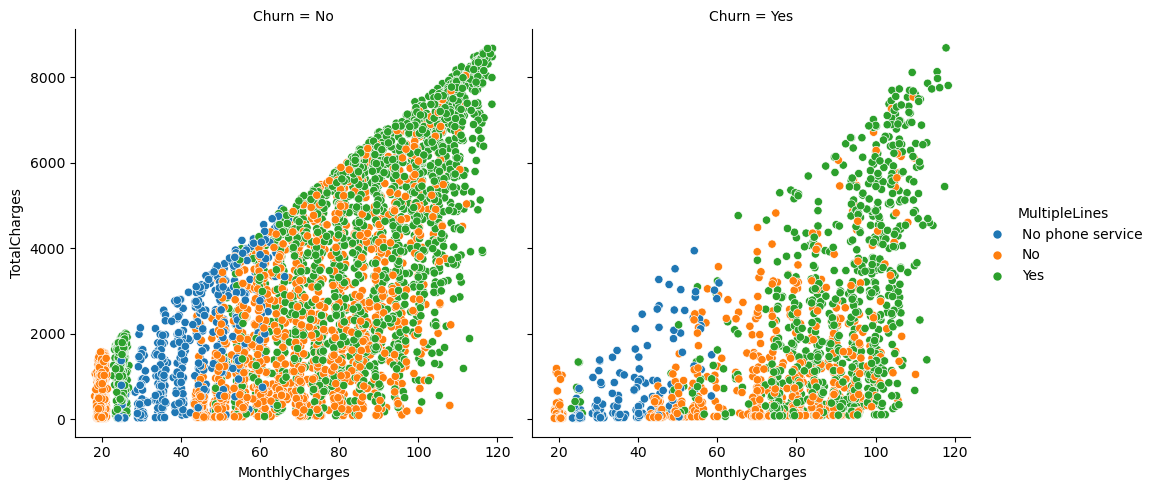

In [169]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='MultipleLines',data=data)
# plt.show()

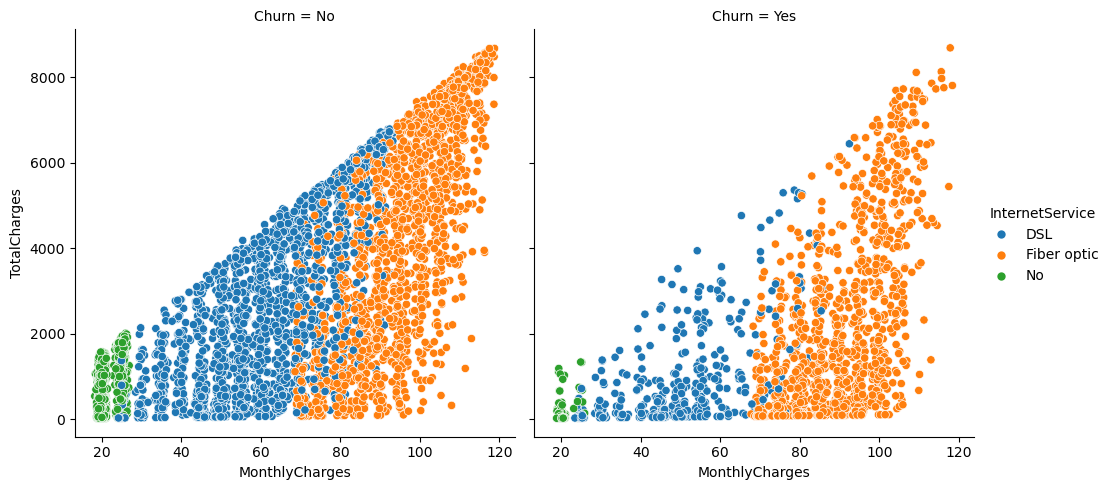

In [170]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='InternetService',data=data)
# plt.show()

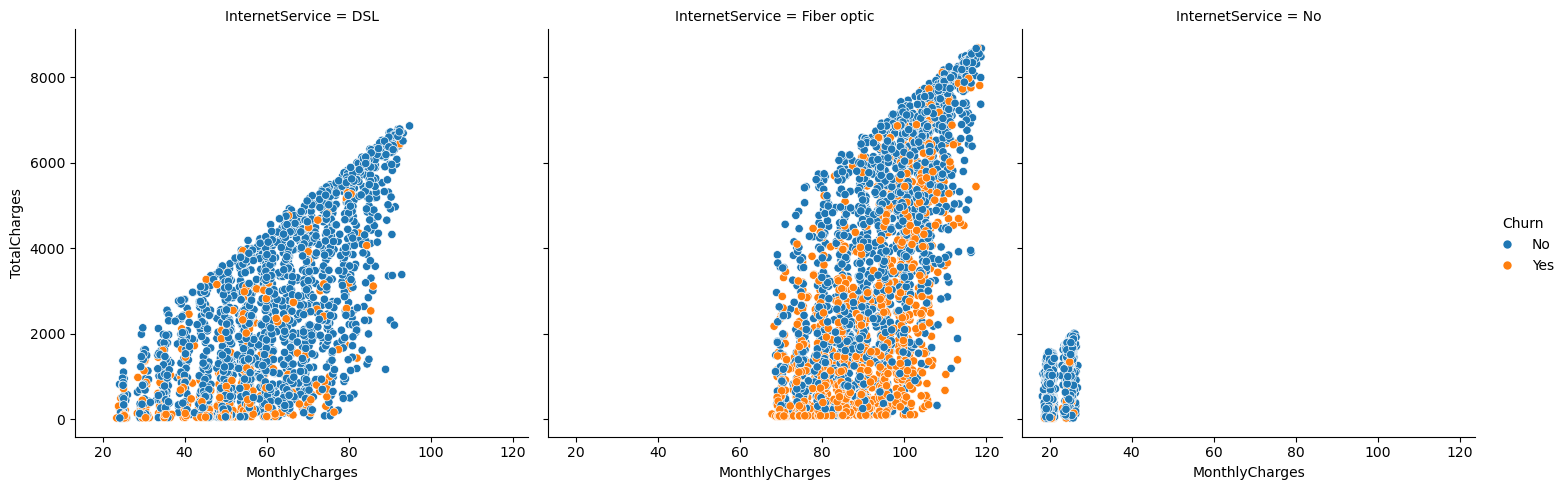

In [171]:
# %matplotlib inline
sns.relplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',col='InternetService',data=data)
# plt.show()

# Correlation Analysis

In [172]:
xtrain[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.252588      0.826637
MonthlyCharges  0.252588        1.000000      0.651293
TotalCharges    0.826637        0.651293      1.000000

In [173]:
# Incase you not able to see the annotations, you can upgrade your seaborn version
# Then restart your kernel, before running the heatmap code
!pip install seaborn --upgrade

<Axes: >

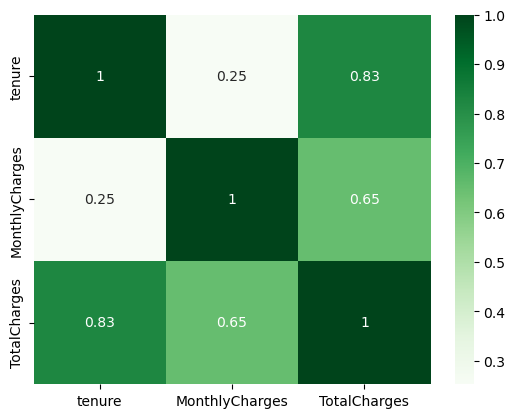

In [174]:
sns.heatmap(xtrain[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(),cmap='Greens',annot=True)

In [175]:
xtrain = xtrain.drop(['TotalCharges'],axis=1)
xtrain.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5023  Female              0      No         No       1          Yes   
2614  Female              0     Yes        Yes      67          Yes   
6823  Female              0      No         No       4          Yes   
1881    Male              0      No         No      26           No   
5488    Male              1     Yes         No      45          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  
5023              Yes           Electronic check           70.30  
2614              Yes    Credit card (automatic)           94.35  
6823              Yes  Bank transfer (automatic)           50.55  
1881              Yes  Bank transfer (automatic)           44.65  
5488              Yes  Bank transfer (automatic)           98.70

In [176]:
xtest = xtest.drop(['TotalCharges'],axis=1)
xtest.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2721    Male              1      No         No      10          Yes   
6255    Male              1     Yes         No      69          Yes   
886   Female              1      No         No       7          Yes   
3412    Male              0     Yes        Yes       2          Yes   
6499    Male              0      No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2721            No     Fiber optic                   No                   No   
6255           Yes     Fiber optic                  Yes                   No   
886             No     Fiber optic                   No                   No   
3412            No             DSL                  Yes                  Yes   
6499            No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2721                   No                   No                   No   
6255                  Yes                  Yes                  Yes   
886                   Yes                   No                  Yes   
3412                   No                  Yes                   No   
6499  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
2721                  Yes  Month-to-month              Yes  Electronic check   
6255                  Yes        One year              Yes      Mailed check   
886                    No  Month-to-month              Yes  Electronic check   
3412                   No        Two year               No      Mailed check   
6499  No internet service  Month-to-month               No      Mailed check   

      MonthlyCharges  
2721           79.25  
6255          110.55  
886            84.35  
3412           59.50  
6499           20.30

# Feature Scaling

## Standard Scaler

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
std = StandardScaler()  # creating an object

In [179]:
xtrain[['tenure','MonthlyCharges']].head()

tenure  MonthlyCharges
5023       1           70.30
2614      67           94.35
6823       4           50.55
1881      26           44.65
5488      45           98.70

In [180]:
std.fit_transform(xtrain[['tenure','MonthlyCharges']])  # training data

array([[-1.27651377,  0.17589961],
       [ 1.40700981,  0.97491038],
       [-1.15453542, -0.48025268],
       ...,
       [-0.78860039, -1.48856773],
       [ 1.28503147,  1.66096328],
       [-1.03255708, -1.52012948]])

In [181]:
xtest[['tenure','MonthlyCharges']].head()

tenure  MonthlyCharges
2721      10           79.25
6255      69          110.55
886        7           84.35
3412       2           59.50
6499       1           20.30

In [182]:
std.transform(xtest[['tenure','MonthlyCharges']])

array([[-0.91057874,  0.47324457],
       [ 1.48832871,  1.51312137],
       [-1.03255708,  0.64268137],
       ...,
       [-0.42266536, -1.49687345],
       [-1.15453542, -0.47028581],
       [-1.03255708, -1.01348024]])

## MinMaxScaler

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
m2s = MinMaxScaler()

In [185]:
xtrain[['tenure','MonthlyCharges']].head()

tenure  MonthlyCharges
5023       1           70.30
2614      67           94.35
6823       4           50.55
1881      26           44.65
5488      45           98.70

In [186]:
m2s.fit_transform(xtrain[['tenure','MonthlyCharges']])

array([[0.01388889, 0.51791045],
       [0.93055556, 0.75721393],
       [0.05555556, 0.32139303],
       ...,
       [0.18055556, 0.01940299],
       [0.88888889, 0.96268657],
       [0.09722222, 0.00995025]])

In [187]:
xtest[['tenure','MonthlyCharges']].head()

tenure  MonthlyCharges
2721      10           79.25
6255      69          110.55
886        7           84.35
3412       2           59.50
6499       1           20.30

In [188]:
m2s.transform(xtest[['tenure','MonthlyCharges']])

array([[0.13888889, 0.60696517],
       [0.95833333, 0.91840796],
       [0.09722222, 0.65771144],
       ...,
       [0.30555556, 0.01691542],
       [0.05555556, 0.32437811],
       [0.09722222, 0.16169154]])

### Replace the original cols in training and testing data

In [189]:
xtrain.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5023  Female              0      No         No       1          Yes   
2614  Female              0     Yes        Yes      67          Yes   
6823  Female              0      No         No       4          Yes   
1881    Male              0      No         No      26           No   
5488    Male              1     Yes         No      45          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  
5023              Yes           Electronic check           70.30  
2614              Yes    Credit card (automatic)           94.35  
6823              Yes  Bank transfer (automatic)           50.55  
1881              Yes  Bank transfer (automatic)           44.65  
5488              Yes  Bank transfer (automatic)           98.70

In [190]:
xtrain.tenure = m2s.fit_transform(xtrain[['tenure']])
xtrain.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
5023  Female              0      No         No  0.013889          Yes   
2614  Female              0     Yes        Yes  0.930556          Yes   
6823  Female              0      No         No  0.055556          Yes   
1881    Male              0      No         No  0.361111           No   
5488    Male              1     Yes         No  0.625000          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  
5023              Yes           Electronic check           70.30  
2614              Yes    Credit card (automatic)           94.35  
6823              Yes  Bank transfer (automatic)           50.55  
1881              Yes  Bank transfer (automatic)           44.65  
5488              Yes  Bank transfer (automatic)           98.70

In [191]:
xtest.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2721    Male              1      No         No      10          Yes   
6255    Male              1     Yes         No      69          Yes   
886   Female              1      No         No       7          Yes   
3412    Male              0     Yes        Yes       2          Yes   
6499    Male              0      No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2721            No     Fiber optic                   No                   No   
6255           Yes     Fiber optic                  Yes                   No   
886             No     Fiber optic                   No                   No   
3412            No             DSL                  Yes                  Yes   
6499            No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2721                   No                   No                   No   
6255                  Yes                  Yes                  Yes   
886                   Yes                   No                  Yes   
3412                   No                  Yes                   No   
6499  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
2721                  Yes  Month-to-month              Yes  Electronic check   
6255                  Yes        One year              Yes      Mailed check   
886                    No  Month-to-month              Yes  Electronic check   
3412                   No        Two year               No      Mailed check   
6499  No internet service  Month-to-month               No      Mailed check   

      MonthlyCharges  
2721           79.25  
6255          110.55  
886            84.35  
3412           59.50  
6499           20.30

In [192]:
xtest.tenure = m2s.transform(xtest[['tenure']])
xtest.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
2721    Male              1      No         No  0.138889          Yes   
6255    Male              1     Yes         No  0.958333          Yes   
886   Female              1      No         No  0.097222          Yes   
3412    Male              0     Yes        Yes  0.027778          Yes   
6499    Male              0      No         No  0.013889          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2721            No     Fiber optic                   No                   No   
6255           Yes     Fiber optic                  Yes                   No   
886             No     Fiber optic                   No                   No   
3412            No             DSL                  Yes                  Yes   
6499            No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2721                   No                   No                   No   
6255                  Yes                  Yes                  Yes   
886                   Yes                   No                  Yes   
3412                   No                  Yes                   No   
6499  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
2721                  Yes  Month-to-month              Yes  Electronic check   
6255                  Yes        One year              Yes      Mailed check   
886                    No  Month-to-month              Yes  Electronic check   
3412                   No        Two year               No      Mailed check   
6499  No internet service  Month-to-month               No      Mailed check   

      MonthlyCharges  
2721           79.25  
6255          110.55  
886            84.35  
3412           59.50  
6499           20.30

In [193]:
xtrain.MonthlyCharges = m2s.fit_transform(xtrain[['MonthlyCharges']])
xtrain.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
5023  Female              0      No         No  0.013889          Yes   
2614  Female              0     Yes        Yes  0.930556          Yes   
6823  Female              0      No         No  0.055556          Yes   
1881    Male              0      No         No  0.361111           No   
5488    Male              1     Yes         No  0.625000          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  
5023              Yes           Electronic check        0.517910  
2614              Yes    Credit card (automatic)        0.757214  
6823              Yes  Bank transfer (automatic)        0.321393  
1881              Yes  Bank transfer (automatic)        0.262687  
5488              Yes  Bank transfer (automatic)        0.800498

In [194]:
xtest.MonthlyCharges = m2s.transform(xtest[['MonthlyCharges']])
xtest.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
2721    Male              1      No         No  0.138889          Yes   
6255    Male              1     Yes         No  0.958333          Yes   
886   Female              1      No         No  0.097222          Yes   
3412    Male              0     Yes        Yes  0.027778          Yes   
6499    Male              0      No         No  0.013889          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2721            No     Fiber optic                   No                   No   
6255           Yes     Fiber optic                  Yes                   No   
886             No     Fiber optic                   No                   No   
3412            No             DSL                  Yes                  Yes   
6499            No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2721                   No                   No                   No   
6255                  Yes                  Yes                  Yes   
886                   Yes                   No                  Yes   
3412                   No                  Yes                   No   
6499  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
2721                  Yes  Month-to-month              Yes  Electronic check   
6255                  Yes        One year              Yes      Mailed check   
886                    No  Month-to-month              Yes  Electronic check   
3412                   No        Two year               No      Mailed check   
6499  No internet service  Month-to-month               No      Mailed check   

      MonthlyCharges  
2721        0.606965  
6255        0.918408  
886         0.657711  
3412        0.410448  
6499        0.020398

# Data Encoding

In [195]:
ytrain.head()

5023    Yes
2614    Yes
6823     No
1881     No
5488     No
Name: Churn, dtype: object

In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
le = LabelEncoder()

In [198]:
le.fit_transform(ytrain)  
# fit part is finding the unique categories and sorting them alphabetically, 
# transform is replacing the categories with numbers

array([1, 1, 0, ..., 0, 0, 1])

In [199]:
ytrain = le.fit_transform(ytrain)  
ytrain

array([1, 1, 0, ..., 0, 0, 1])

In [200]:
ytest.head()

2721    Yes
6255     No
886      No
3412     No
6499     No
Name: Churn, dtype: object

In [201]:
ytest = le.transform(ytest)
ytest

array([1, 0, 0, ..., 0, 1, 1])

In [202]:
xtrain.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
5023  Female              0      No         No  0.013889          Yes   
2614  Female              0     Yes        Yes  0.930556          Yes   
6823  Female              0      No         No  0.055556          Yes   
1881    Male              0      No         No  0.361111           No   
5488    Male              1     Yes         No  0.625000          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  
5023              Yes           Electronic check        0.517910  
2614              Yes    Credit card (automatic)        0.757214  
6823              Yes  Bank transfer (automatic)        0.321393  
1881              Yes  Bank transfer (automatic)        0.262687  
5488              Yes  Bank transfer (automatic)        0.800498

In [203]:
pd.get_dummies(xtrain.gender).astype('int')

Female  Male
5023       1     0
2614       1     0
6823       1     0
1881       0     1
5488       0     1
...      ...   ...
3865       1     0
2520       1     0
2165       1     0
2766       1     0
966        0     1

[5986 rows x 2 columns]

In [204]:
xtrain['Is_Female'] = pd.get_dummies(xtrain.gender).astype('int')['Female']
del xtrain['gender']
xtrain.head()

SeniorCitizen Partner Dependents    tenure PhoneService  \
5023              0      No         No  0.013889          Yes   
2614              0     Yes        Yes  0.930556          Yes   
6823              0      No         No  0.055556          Yes   
1881              0      No         No  0.361111           No   
5488              1     Yes         No  0.625000          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  Is_Female  
5023              Yes           Electronic check        0.517910          1  
2614              Yes    Credit card (automatic)        0.757214          1  
6823              Yes  Bank transfer (automatic)        0.321393          1  
1881              Yes  Bank transfer (automatic)        0.262687          0  
5488              Yes  Bank transfer (automatic)        0.800498          0

In [205]:
xtrain['Partner'].value_counts()

Partner
No     3105
Yes    2881
Name: count, dtype: int64

In [206]:
pd.get_dummies(xtrain.Partner).astype('int')

No  Yes
5023   1    0
2614   0    1
6823   1    0
1881   1    0
5488   0    1
...   ..  ...
3865   1    0
2520   0    1
2165   1    0
2766   0    1
966    1    0

[5986 rows x 2 columns]

In [207]:
xtrain['Has_Partner'] = pd.get_dummies(xtrain.Partner).astype('int')['Yes']
del xtrain['Partner']
xtrain.head()

SeniorCitizen Dependents    tenure PhoneService     MultipleLines  \
5023              0         No  0.013889          Yes                No   
2614              0        Yes  0.930556          Yes               Yes   
6823              0         No  0.055556          Yes                No   
1881              0         No  0.361111           No  No phone service   
5488              1         No  0.625000          Yes               Yes   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
5023     Fiber optic             No           No               No          No   
2614     Fiber optic            Yes           No               No         Yes   
6823             DSL            Yes           No               No          No   
1881             DSL            Yes          Yes               No          No   
5488     Fiber optic             No          Yes              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
5023          No              No  Month-to-month              Yes   
2614          No             Yes        One year              Yes   
6823          No              No  Month-to-month              Yes   
1881          No             Yes  Month-to-month              Yes   
5488         Yes              No        One year              Yes   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  
5023           Electronic check        0.517910          1            0  
2614    Credit card (automatic)        0.757214          1            1  
6823  Bank transfer (automatic)        0.321393          1            0  
1881  Bank transfer (automatic)        0.262687          0            0  
5488  Bank transfer (automatic)        0.800498          0            1

In [208]:
xtrain['Has_Dependents'] = pd.get_dummies(xtrain.Dependents).astype('int')['Yes']
del xtrain['Dependents']
xtrain.head()

SeniorCitizen    tenure PhoneService     MultipleLines InternetService  \
5023              0  0.013889          Yes                No     Fiber optic   
2614              0  0.930556          Yes               Yes     Fiber optic   
6823              0  0.055556          Yes                No             DSL   
1881              0  0.361111           No  No phone service             DSL   
5488              1  0.625000          Yes               Yes     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
5023             No           No               No          No          No   
2614            Yes           No               No         Yes          No   
6823            Yes           No               No          No          No   
1881            Yes          Yes               No          No          No   
5488             No          Yes              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
5023              No  Month-to-month              Yes   
2614             Yes        One year              Yes   
6823              No  Month-to-month              Yes   
1881             Yes  Month-to-month              Yes   
5488              No        One year              Yes   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  \
5023           Electronic check        0.517910          1            0   
2614    Credit card (automatic)        0.757214          1            1   
6823  Bank transfer (automatic)        0.321393          1            0   
1881  Bank transfer (automatic)        0.262687          0            0   
5488  Bank transfer (automatic)        0.800498          0            1   

      Has_Dependents  
5023               0  
2614               1  
6823               0  
1881               0  
5488               0

In [209]:
xtrain['PhoneService'].value_counts()

PhoneService
Yes    5413
No      573
Name: count, dtype: int64

In [210]:
xtrain['MultipleLines'].value_counts()

MultipleLines
No                  2874
Yes                 2539
No phone service     573
Name: count, dtype: int64

In [211]:
xtrain['Has_PhoneService'] = pd.get_dummies(xtrain.PhoneService).astype('int')['Yes']
del xtrain['PhoneService']
xtrain.head()

SeniorCitizen    tenure     MultipleLines InternetService  \
5023              0  0.013889                No     Fiber optic   
2614              0  0.930556               Yes     Fiber optic   
6823              0  0.055556                No             DSL   
1881              0  0.361111  No phone service             DSL   
5488              1  0.625000               Yes     Fiber optic   

     OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
5023             No           No               No          No          No   
2614            Yes           No               No         Yes          No   
6823            Yes           No               No          No          No   
1881            Yes          Yes               No          No          No   
5488             No          Yes              Yes         Yes         Yes   

     StreamingMovies        Contract PaperlessBilling  \
5023              No  Month-to-month              Yes   
2614             Yes        One year              Yes   
6823              No  Month-to-month              Yes   
1881             Yes  Month-to-month              Yes   
5488              No        One year              Yes   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  \
5023           Electronic check        0.517910          1            0   
2614    Credit card (automatic)        0.757214          1            1   
6823  Bank transfer (automatic)        0.321393          1            0   
1881  Bank transfer (automatic)        0.262687          0            0   
5488  Bank transfer (automatic)        0.800498          0            1   

      Has_Dependents  Has_PhoneService  
5023               0                 1  
2614               1                 1  
6823               0                 1  
1881               0                 0  
5488               0                 1

In [212]:
xtrain['Has_MultipleLines'] = xtrain['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})
del xtrain['MultipleLines']
xtrain.head()

SeniorCitizen    tenure InternetService OnlineSecurity OnlineBackup  \
5023              0  0.013889     Fiber optic             No           No   
2614              0  0.930556     Fiber optic            Yes           No   
6823              0  0.055556             DSL            Yes           No   
1881              0  0.361111             DSL            Yes          Yes   
5488              1  0.625000     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  Is_Female  \
5023              Yes           Electronic check        0.517910          1   
2614              Yes    Credit card (automatic)        0.757214          1   
6823              Yes  Bank transfer (automatic)        0.321393          1   
1881              Yes  Bank transfer (automatic)        0.262687          0   
5488              Yes  Bank transfer (automatic)        0.800498          0   

      Has_Partner  Has_Dependents  Has_PhoneService  Has_MultipleLines  
5023            0               0                 1                  0  
2614            1               1                 1                  1  
6823            0               0                 1                  0  
1881            0               0                 0                  0  
5488            1               0                 1                  1

In [213]:
xtrain['InternetService'].value_counts()

InternetService
Fiber optic    2649
DSL            2053
No             1284
Name: count, dtype: int64

In [214]:
xtrain['OnlineSecurity'].value_counts()

OnlineSecurity
No                     2986
Yes                    1716
No internet service    1284
Name: count, dtype: int64

In [215]:
xtrain['OnlineBackup'].value_counts()

OnlineBackup
No                     2629
Yes                    2073
No internet service    1284
Name: count, dtype: int64

In [216]:
xtrain['DeviceProtection'].value_counts()

DeviceProtection
No                     2633
Yes                    2069
No internet service    1284
Name: count, dtype: int64

In [217]:
xtrain['TechSupport'].value_counts()

TechSupport
No                     2948
Yes                    1754
No internet service    1284
Name: count, dtype: int64

In [218]:
xtrain['StreamingTV'].value_counts()

StreamingTV
No                     2396
Yes                    2306
No internet service    1284
Name: count, dtype: int64

In [219]:
xtrain['StreamingMovies'].value_counts()

StreamingMovies
No                     2361
Yes                    2341
No internet service    1284
Name: count, dtype: int64

In [220]:
xtrain['InternetService_Encoded'] = xtrain['InternetService'].map({'DSL':1,'No':0,'Fiber optic':2})
del xtrain['InternetService']
xtrain.head()

SeniorCitizen    tenure OnlineSecurity OnlineBackup DeviceProtection  \
5023              0  0.013889             No           No               No   
2614              0  0.930556            Yes           No               No   
6823              0  0.055556            Yes           No               No   
1881              0  0.361111            Yes          Yes               No   
5488              1  0.625000             No          Yes              Yes   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
5023          No          No              No  Month-to-month              Yes   
2614         Yes          No             Yes        One year              Yes   
6823          No          No              No  Month-to-month              Yes   
1881          No          No             Yes  Month-to-month              Yes   
5488         Yes         Yes              No        One year              Yes   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  \
5023           Electronic check        0.517910          1            0   
2614    Credit card (automatic)        0.757214          1            1   
6823  Bank transfer (automatic)        0.321393          1            0   
1881  Bank transfer (automatic)        0.262687          0            0   
5488  Bank transfer (automatic)        0.800498          0            1   

      Has_Dependents  Has_PhoneService  Has_MultipleLines  \
5023               0                 1                  0   
2614               1                 1                  1   
6823               0                 1                  0   
1881               0                 0                  0   
5488               0                 1                  1   

      InternetService_Encoded  
5023                        2  
2614                        2  
6823                        1  
1881                        1  
5488                        2

In [222]:
xtrain['Has_OnlineSecurity'] = xtrain['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['OnlineSecurity']
xtrain['Has_OnlineBackup'] = xtrain['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['OnlineBackup']
xtrain['Has_DeviceProtection'] = xtrain['DeviceProtection'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['DeviceProtection']
xtrain['Has_TechSupport'] = xtrain['TechSupport'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['TechSupport']
xtrain['Has_StreamingTV'] = xtrain['StreamingTV'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['StreamingTV']
xtrain['Has_StreamingMovies'] = xtrain['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':0})
del xtrain['StreamingMovies']
xtrain.head()

SeniorCitizen    tenure        Contract PaperlessBilling  \
5023              0  0.013889  Month-to-month              Yes   
2614              0  0.930556        One year              Yes   
6823              0  0.055556  Month-to-month              Yes   
1881              0  0.361111  Month-to-month              Yes   
5488              1  0.625000        One year              Yes   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  \
5023           Electronic check        0.517910          1            0   
2614    Credit card (automatic)        0.757214          1            1   
6823  Bank transfer (automatic)        0.321393          1            0   
1881  Bank transfer (automatic)        0.262687          0            0   
5488  Bank transfer (automatic)        0.800498          0            1   

      Has_Dependents  Has_PhoneService  Has_MultipleLines  \
5023               0                 1                  0   
2614               1                 1                  1   
6823               0                 1                  0   
1881               0                 0                  0   
5488               0                 1                  1   

      InternetService_Encoded  Has_OnlineSecurity  Has_OnlineBackup  \
5023                        2                   0                 0   
2614                        2                   1                 0   
6823                        1                   1                 0   
1881                        1                   1                 1   
5488                        2                   0                 1   

      Has_DeviceProtection  Has_TechSupport  Has_StreamingTV  \
5023                     0                0                0   
2614                     0                1                0   
6823                     0                0                0   
1881                     0                0                0   
5488                     1                1                1   

      Has_StreamingMovies  
5023                    0  
2614                    1  
6823                    0  
1881                    1  
5488                    0

In [223]:
xtrain.head(20)

SeniorCitizen    tenure        Contract PaperlessBilling  \
5023              0  0.013889  Month-to-month              Yes   
2614              0  0.930556        One year              Yes   
6823              0  0.055556  Month-to-month              Yes   
1881              0  0.361111  Month-to-month              Yes   
5488              1  0.625000        One year              Yes   
1439              1  0.069444  Month-to-month              Yes   
4076              0  0.972222        Two year              Yes   
6983              0  0.319444  Month-to-month               No   
4446              1  0.041667  Month-to-month              Yes   
389               0  0.013889  Month-to-month               No   
6197              0  0.236111  Month-to-month               No   
3295              0  1.000000        Two year               No   
2747              0  0.097222  Month-to-month              Yes   
5903              0  0.722222        Two year              Yes   
4847              1  0.513889  Month-to-month              Yes   
4264              1  0.638889  Month-to-month              Yes   
1422              0  0.972222        Two year              Yes   
4065              0  0.013889  Month-to-month               No   
4689              0  0.027778  Month-to-month               No   
1220              0  0.236111  Month-to-month               No   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  \
5023           Electronic check        0.517910          1            0   
2614    Credit card (automatic)        0.757214          1            1   
6823  Bank transfer (automatic)        0.321393          1            0   
1881  Bank transfer (automatic)        0.262687          0            0   
5488  Bank transfer (automatic)        0.800498          0            1   
1439    Credit card (automatic)        0.570149          1            0   
4076    Credit card (automatic)        0.806965          0            1   
6983  Bank transfer (automatic)        0.646269          1            0   
4446           Electronic check        0.613433          0            0   
389            Electronic check        0.256219          0            0   
6197               Mailed check        0.330846          0            0   
3295  Bank transfer (automatic)        0.616418          1            1   
2747               Mailed check        0.011443          0            0   
5903    Credit card (automatic)        0.729851          0            1   
4847           Electronic check        0.577114          1            0   
4264           Electronic check        0.857711          1            0   
1422    Credit card (automatic)        0.943284          1            1   
4065               Mailed check        0.014925          0            0   
4689           Electronic check        0.016418          1            0   
1220  Bank transfer (automatic)        0.472637          0            0   

      Has_Dependents  Has_PhoneService  Has_MultipleLines  \
5023               0                 1                  0   
2614               1                 1                  1   
6823               0                 1                  0   
1881               0                 0                  0   
5488               0                 1                  1   
1439               0                 1                  0   
4076               0                 1                  1   
6983               0                 1                  0   
4446               0                 1                  0   
389                1                 1                  0   
6197               0                 1                  0   
3295               1                 1                  1   
2747               0                 1                  0   
5903               0                 1                  1   
4847               0                 1                  1   
4264               0                 1                  1   
1422  

In [224]:
xtrain['Contract'] = le.fit_transform(xtrain['Contract'])  
xtrain.head()

SeniorCitizen    tenure  Contract PaperlessBilling  \
5023              0  0.013889         0              Yes   
2614              0  0.930556         1              Yes   
6823              0  0.055556         0              Yes   
1881              0  0.361111         0              Yes   
5488              1  0.625000         1              Yes   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  \
5023           Electronic check        0.517910          1            0   
2614    Credit card (automatic)        0.757214          1            1   
6823  Bank transfer (automatic)        0.321393          1            0   
1881  Bank transfer (automatic)        0.262687          0            0   
5488  Bank transfer (automatic)        0.800498          0            1   

      Has_Dependents  Has_PhoneService  Has_MultipleLines  \
5023               0                 1                  0   
2614               1                 1                  1   
6823               0                 1                  0   
1881               0                 0                  0   
5488               0                 1                  1   

      InternetService_Encoded  Has_OnlineSecurity  Has_OnlineBackup  \
5023                        2                   0                 0   
2614                        2                   1                 0   
6823                        1                   1                 0   
1881                        1                   1                 1   
5488                        2                   0                 1   

      Has_DeviceProtection  Has_TechSupport  Has_StreamingTV  \
5023                     0                0                0   
2614                     0                1                0   
6823                     0                0                0   
1881                     0                0                0   
5488                     1                1                1   

      Has_StreamingMovies  
5023                    0  
2614                    1  
6823                    0  
1881                    1  
5488                    0

In [225]:
xtrain.head(10)

SeniorCitizen    tenure  Contract PaperlessBilling  \
5023              0  0.013889         0              Yes   
2614              0  0.930556         1              Yes   
6823              0  0.055556         0              Yes   
1881              0  0.361111         0              Yes   
5488              1  0.625000         1              Yes   
1439              1  0.069444         0              Yes   
4076              0  0.972222         2              Yes   
6983              0  0.319444         0               No   
4446              1  0.041667         0              Yes   
389               0  0.013889         0               No   

                  PaymentMethod  MonthlyCharges  Is_Female  Has_Partner  \
5023           Electronic check        0.517910          1            0   
2614    Credit card (automatic)        0.757214          1            1   
6823  Bank transfer (automatic)        0.321393          1            0   
1881  Bank transfer (automatic)        0.262687          0            0   
5488  Bank transfer (automatic)        0.800498          0            1   
1439    Credit card (automatic)        0.570149          1            0   
4076    Credit card (automatic)        0.806965          0            1   
6983  Bank transfer (automatic)        0.646269          1            0   
4446           Electronic check        0.613433          0            0   
389            Electronic check        0.256219          0            0   

      Has_Dependents  Has_PhoneService  Has_MultipleLines  \
5023               0                 1                  0   
2614               1                 1                  1   
6823               0                 1                  0   
1881               0                 0                  0   
5488               0                 1                  1   
1439               0                 1                  0   
4076               0                 1                  1   
6983               0                 1                  0   
4446               0                 1                  0   
389                1                 1                  0   

      InternetService_Encoded  Has_OnlineSecurity  Has_OnlineBackup  \
5023                        2                   0                 0   
2614                        2                   1                 0   
6823                        1                   1                 0   
1881                        1                   1                 1   
5488                        2                   0                 1   
1439                        2                   0                 0   
4076                        2                   1                 1   
6983                        2                   0                 1   
4446                        2                   0                 0   
389                         1                   0                 0   

      Has_DeviceProtection  Has_TechSupport  Has_StreamingTV  \
5023                     0                0                0   
2614                     0                1                0   
6823                     0                0                0   
1881                     0                0                0   
5488                     1                1                1   
1439                     1                0                0   
4076                     1                0                1   
6983                     1                1                0   
4446                     0                0                1   
389                      0                0                0   

      Has_StreamingMovies  
5023                    0  
2614                    1  
6823                    0  
1881                    1  
5488                    0  
1439                    0  
4076                    0  
6983                    0  
4446                    0  
389                     0

In [226]:
xtrain['Has_PaperlessBilling'] = pd.get_dummies(xtrain.PaperlessBilling).astype('int')['Yes']
del xtrain['PaperlessBilling']
xtrain.head()

SeniorCitizen    tenure  Contract              PaymentMethod  \
5023              0  0.013889         0           Electronic check   
2614              0  0.930556         1    Credit card (automatic)   
6823              0  0.055556         0  Bank transfer (automatic)   
1881              0  0.361111         0  Bank transfer (automatic)   
5488              1  0.625000         1  Bank transfer (automatic)   

      MonthlyCharges  Is_Female  Has_Partner  Has_Dependents  \
5023        0.517910          1            0               0   
2614        0.757214          1            1               1   
6823        0.321393          1            0               0   
1881        0.262687          0            0               0   
5488        0.800498          0            1               0   

      Has_PhoneService  Has_MultipleLines  InternetService_Encoded  \
5023                 1                  0                        2   
2614                 1                  1                        2   
6823                 1                  0                        1   
1881                 0                  0                        1   
5488                 1                  1                        2   

      Has_OnlineSecurity  Has_OnlineBackup  Has_DeviceProtection  \
5023                   0                 0                     0   
2614                   1                 0                     0   
6823                   1                 0                     0   
1881                   1                 1                     0   
5488                   0                 1                     1   

      Has_TechSupport  Has_StreamingTV  Has_StreamingMovies  \
5023                0                0                    0   
2614                1                0                    1   
6823                0                0                    0   
1881                0                0                    1   
5488                1                1                    0   

      Has_PaperlessBilling  
5023                     1  
2614                     1  
6823                     1  
1881                     1  
5488                     1

In [227]:
xtrain.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2007
Mailed check                 1355
Bank transfer (automatic)    1313
Credit card (automatic)      1311
Name: count, dtype: int64

In [228]:
pd.get_dummies(xtrain.PaymentMethod).astype('int')

Bank transfer (automatic)  Credit card (automatic)  Electronic check  \
5023                          0                        0                 1   
2614                          0                        1                 0   
6823                          1                        0                 0   
1881                          1                        0                 0   
5488                          1                        0                 0   
...                         ...                      ...               ...   
3865                          0                        0                 0   
2520                          0                        0                 0   
2165                          0                        0                 0   
2766                          0                        0                 1   
966                           0                        0                 1   

      Mailed check  
5023             0  
2614             0  
6823             0  
1881             0  
5488             0  
...            ...  
3865             1  
2520             1  
2165             1  
2766             0  
966              0  

[5986 rows x 4 columns]

In [230]:
xtrain['Paid_using_Bank_Transfer'] = pd.get_dummies(xtrain.PaymentMethod).astype('int')['Bank transfer (automatic)']
xtrain['Paid_using_Credit_Card'] = pd.get_dummies(xtrain.PaymentMethod).astype('int')['Credit card (automatic)']
xtrain['Paid_using_Electronic_Check'] = pd.get_dummies(xtrain.PaymentMethod).astype('int')['Electronic check']
del xtrain['PaymentMethod']
xtrain.head()

SeniorCitizen    tenure  Contract  MonthlyCharges  Is_Female  \
5023              0  0.013889         0        0.517910          1   
2614              0  0.930556         1        0.757214          1   
6823              0  0.055556         0        0.321393          1   
1881              0  0.361111         0        0.262687          0   
5488              1  0.625000         1        0.800498          0   

      Has_Partner  Has_Dependents  Has_PhoneService  Has_MultipleLines  \
5023            0               0                 1                  0   
2614            1               1                 1                  1   
6823            0               0                 1                  0   
1881            0               0                 0                  0   
5488            1               0                 1                  1   

      InternetService_Encoded  Has_OnlineSecurity  Has_OnlineBackup  \
5023                        2                   0                 0   
2614                        2                   1                 0   
6823                        1                   1                 0   
1881                        1                   1                 1   
5488                        2                   0                 1   

      Has_DeviceProtection  Has_TechSupport  Has_StreamingTV  \
5023                     0                0                0   
2614                     0                1                0   
6823                     0                0                0   
1881                     0                0                0   
5488                     1                1                1   

      Has_StreamingMovies  Has_PaperlessBilling  Paid_using_Bank_Transfer  \
5023                    0                     1                         0   
2614                    1                     1                         0   
6823                    0                     1                         1   
1881                    1                     1                         1   
5488                    0                     1                         1   

      Paid_using_Credit_Card  Paid_using_Electronic_Check  
5023                       0                            1  
2614                       1                            0  
6823                       0                            0  
1881                       0                            0  
5488                       0                            0

In [232]:
xtrain.head(20)

SeniorCitizen    tenure  Contract  MonthlyCharges  Is_Female  \
5023              0  0.013889         0        0.517910          1   
2614              0  0.930556         1        0.757214          1   
6823              0  0.055556         0        0.321393          1   
1881              0  0.361111         0        0.262687          0   
5488              1  0.625000         1        0.800498          0   
1439              1  0.069444         0        0.570149          1   
4076              0  0.972222         2        0.806965          0   
6983              0  0.319444         0        0.646269          1   
4446              1  0.041667         0        0.613433          0   
389               0  0.013889         0        0.256219          0   
6197              0  0.236111         0        0.330846          0   
3295              0  1.000000         2        0.616418          1   
2747              0  0.097222         0        0.011443          0   
5903              0  0.722222         2        0.729851          0   
4847              1  0.513889         0        0.577114          1   
4264              1  0.638889         0        0.857711          1   
1422              0  0.972222         2        0.943284          1   
4065              0  0.013889         0        0.014925          0   
4689              0  0.027778         0        0.016418          1   
1220              0  0.236111         0        0.472637          0   

      Has_Partner  Has_Dependents  Has_PhoneService  Has_MultipleLines  \
5023            0               0                 1                  0   
2614            1               1                 1                  1   
6823            0               0                 1                  0   
1881            0               0                 0                  0   
5488            1               0                 1                  1   
1439            0               0                 1                  0   
4076            1               0                 1                  1   
6983            0               0                 1                  0   
4446            0               0                 1                  0   
389             0               1                 1                  0   
6197            0               0                 1                  0   
3295            1               1                 1                  1   
2747            0               0                 1                  0   
5903            1               0                 1                  1   
4847            0               0                 1                  1   
4264            0               0                 1                  1   
1422            1               1                 1                  1   
4065            0               0                 1                  0   
4689            0               0                 1                  0   
1220            0               0                 1                  1   

      InternetService_Encoded  Has_OnlineSecurity  Has_OnlineBackup  \
5023                        2                   0                 0   
2614                        2                   1                 0   
6823                        1                   1                 0   
1881                        1                   1                 1   
5488                        2                   0                 1   
1439                        2                   0                 0   
4076                        2                   1                 1   
6983                        2                   0                 1   
4446                        2                   0                 0   
389                         1                   0                 0   
6197                        1                   0                 0   
3295                        1                   1                 1   
2747                        0                   0        